<a href="https://colab.research.google.com/github/luisbelb39-dot/Inteligencia-Artificial/blob/main/Multicapa_Jos%C3%A9Luis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TAREA (4) ACT **Multicapa** **texto en negrita**

## Clasificación de Un **Empleado**

In [4]:
import numpy as np
import pandas as pd

# Generar dataset sintético con diferentes rangos por habilidad
n_muestras = 5000
# Habilidades técnicas: 70-100
tec = np.random.randint(70, 101, (n_muestras, 6))
# Habilidades matemáticas: 60-90
mat = np.random.randint(60, 91, (n_muestras, 6))
# Habilidades psicológicas: 50-85
psi = np.random.randint(50, 86, (n_muestras, 6))
# Nombres de columnas
columnas = [
    'python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube',
    'estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado',
    'trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas'
]
# Crear DataFrame
df = pd.DataFrame(np.concatenate([tec, mat, psi], axis=1), columns=columnas)

In [5]:
# Calcular promedio por grupo y promedio total
prom_tecnologicas = df[['python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube']].mean(axis=1)
prom_matematicas  = df[['estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado']].mean(axis=1)
prom_psicologicas = df[['trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas']].mean(axis=1)
# Promedio total = promedio de los 3 promedios
prom_total = (prom_tecnologicas + prom_matematicas + prom_psicologicas) / 3
# Etiqueta: 1 = apto si promedio total > 80
y = (prom_total > 75).astype(int)
# one-hot encoding
y = pd.get_dummies(y).values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42
)

# Escalamiento
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')
])

adam = Adam(learning_rate=0.001)
modelo.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
#entrenamiento
history = modelo.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 5.6964e-08 - val_accuracy: 0.9910 - val_loss: 0.0631
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.5828e-08 - val_accuracy: 0.9910 - val_loss: 0.0666
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.7051e-08 - val_accuracy: 0.9910 - val_loss: 0.0671
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.7541e-08 - val_accuracy: 0.9910 - val_loss: 0.0670
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.9104e-08 - val_accuracy: 0.9920 - val_loss: 0.0680
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.2894e-08 - val_accuracy: 0.9910 - val_loss: 0.0694
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 1.1344e-08 - val_accuracy: 0.9910 - val_loss: 0.0702
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - los

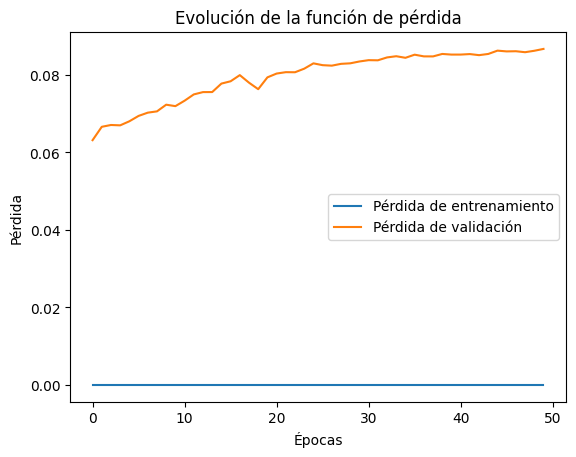

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9915 - loss: 0.0644

🔹 Loss: 0.0867  |  Accuracy: 0.9910


In [10]:
#evaluacion
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la función de pérdida')
plt.show()

loss, acc = modelo.evaluate(X_test, y_test)
print(f"\n🔹 Loss: {loss:.4f}  |  Accuracy: {acc:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


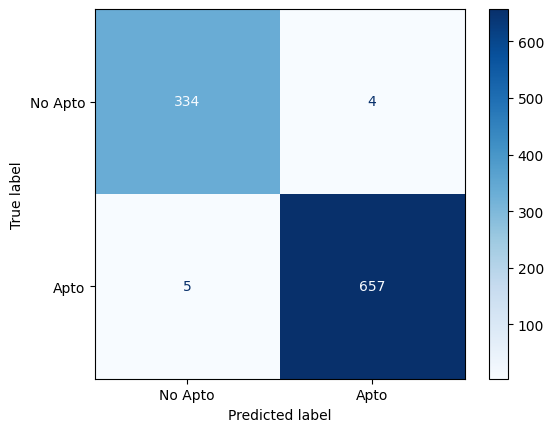


Sensitivity (Recall) por clase:
No Apto: 0.99
Apto: 0.99


In [11]:
#matriz de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

pred = modelo.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Apto', 'Apto'])
disp.plot(cmap='Blues')
plt.show()

sensitivity = recall_score(y_true, y_pred, average=None)
print("\nSensitivity (Recall) por clase:")
print(f"No Apto: {sensitivity[0]:.2f}")
print(f"Apto: {sensitivity[1]:.2f}")

In [12]:
nuevo_candidato = np.array([[90, 88, 85, 87, 84, 89,   # técnicas
                             82, 86, 85, 83, 87, 80,   # matemáticas
                             70, 75, 80, 72, 78, 74]]) # psicológicas

nuevo_candidato_scaled = scaler.transform(nuevo_candidato)
pred_nuevo = modelo.predict(nuevo_candidato_scaled)
clase_predicha = np.argmax(pred_nuevo)

print("Evaluación de nuevo candidato:")
print(f"Resultado: {'Apto' if clase_predicha == 1 else 'No Apto'}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Evaluación de nuevo candidato:
Resultado: Apto


## Clasificación Flor de **Iris**

In [13]:
#cargamos el dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [14]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [15]:
print(iris.DESCR) # nos da informacion de la flor

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [16]:
iris.target_names    #valores de algunas llaves del dataset
iris.target
iris.data
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
import pandas as pd #Importamos el módulo pandas y creamos un Data Frame.

iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])   #Para tener una mejor visualización de datos
                                                                            # si el target es 0, entonces la especie es setosa
                                                                            # si el target es 1, entonces la especie es versicolor y si el target es 2, la especie es virginica.
iris_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Popularidad de una Canción **texto en negrita**

In [18]:
#Cargamos el dataset
import pandas as pd

url = "https://raw.githubusercontent.com/mevangelista-alvarado/datasets/refs/heads/main/spotify_songs.csv"
df = pd.read_csv(url)


In [19]:
df # visualizamos el dataset


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [20]:
# Seleccionar características (features)
features = [
    'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'duration_ms',
]
X = df[features].values

# Target numérico
y = df['popularity'].values


In [21]:
#Dividir el conjunto en datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)


In [22]:
#Normalizar los parámetros de entrada
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
#Definir el modelo de red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam #Crear un optimizador Adam con una tasa de aprendizaje del 0.001

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

model.compile(   # se copila el modelo utilizando el optimizador Adam
    optimizer=adam_optimizer,
    loss='mse',
    metrics=['mae'],
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
from tensorflow.keras.optimizers import Adam #Crear un optimizador Adam con una tasa de aprendizaje del 0.001

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)


In [ ]:
model.compile(   # se copila el modelo utilizando el optimizador Adam
    optimizer=adam_optimizer,
    loss='mse',
    metrics=['mae'],
)

In [27]:
history = model.fit( #Entrenar el modelo
    X_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=50,
)

Epoch 1/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 736.3234 - mae: 21.9119 - val_loss: 485.2245 - val_mae: 18.2256
Epoch 2/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 488.0398 - mae: 18.3345 - val_loss: 479.1557 - val_mae: 18.0617
Epoch 3/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 478.4250 - mae: 18.0998 - val_loss: 475.7408 - val_mae: 18.0645
Epoch 4/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 466.6379 - mae: 17.8184 - val_loss: 466.8292 - val_mae: 17.7662
Epoch 5/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 462.5751 - mae: 17.6642 - val_loss: 466.8361 - val_mae: 17.7794
Epoch 6/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 461.2166 - mae: 17.6281 - val_loss: 463.2762 - val_mae: 17.6412
Epoch 7/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 459.5007 - mae: 17.6018 - val_loss: 461.0291 - val_mae: 17.5945
Epoch 8/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 452.2986 - mae: 17.4233 - val_loss: 463.7550 - val_mae: 

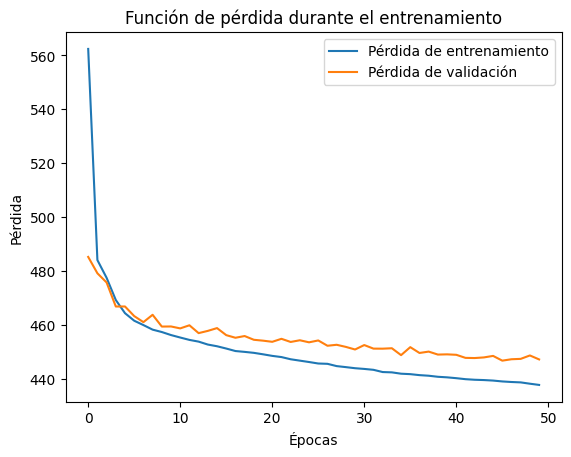

In [28]:
import matplotlib.pyplot as plt #Gráficando la función de pérdida

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


In [29]:
loss, mae = model.evaluate(X_test, y_test) #Evaluación
print(f"MAE en el conjunto test: {mae}")


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 446.4383 - mae: 17.1477
MAE en el conjunto test: 17.07365608215332


In [30]:
import pandas as pd #Hacer predicciones y compararlas con los valores reales

predictions = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head())


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
   Actual  Predicted
0      50  46.239182
1      11  12.134340
2       0  24.678152
3       0  26.765814
4      57  37.743256


In [33]:
# indice a selecionar
i = 0
cancion = df.iloc[i]
X_input = cancion[features].values.reshape(1, -1)
X_input = scaler.transform(X_input)

prediccion = model.predict(X_input)[0][0]
print(f"Canción: {cancion['track_name']} - {cancion['artists']}")
print(f"Popularidad real: {cancion['popularity']}")
print(f"Predicción: {prediccion:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Canción: Comedy - Gen Hoshino
Popularidad real: 73
Predicción: 33.89


In [32]:
from sklearn.metrics import r2_score, mean_squared_error #otras metricas

r2 = r2_score(y_test, predictions)
print(f'R²: {r2}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

R²: 0.10568594932556152
MSE: 441.3269348144531


## Predicción de **Combustible**

In [34]:
pip install ucimlrepo #permite acceder fácilmente a los conjuntos de datos del repositorio UCI Machine Learning Repository

In [35]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets


In [36]:
X.head() #mostramos el conjunto x

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [37]:
y.head() #mostramos en conjunto y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [38]:
X.info() #cuantas variabes nulas tiene el conjunto X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [39]:
y.info() #cuantas variabes nulas tiene el conjunto y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [40]:
import pandas as pd

df = pd.concat([X, y], axis=1).dropna()

In [41]:
df.info() #cuantas variabes nulas tiene el conjunto



<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [42]:
X = df.drop('mpg', axis=1) #nuevamente debemos definir los conjuntos X e Y
y = df['mpg']


In [43]:
from sklearn.model_selection import train_test_split #Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=1
)


In [44]:
print(X_train.shape)
print(X_test.shape)


(313, 7)
(79, 7)


In [45]:
from sklearn.preprocessing import StandardScaler #Escalar los datos para que los datos tengan una media de 0 y una desviación estándar de 1

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [47]:
import tensorflow as tf #Definir el modelo de red neuronal
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
from tensorflow.keras.optimizers import Adam #Crear un optimizador Adam con una tasa de aprendizaje del 0.001

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)


In [49]:
model.compile(
    optimizer=adam_optimizer,
    loss='mean_squared_error',
    metrics=['root_mean_squared_error'],     #Se compila el modelo utilizando el optimizador Adam y la función de pérdida error cuadrático medio  (mean_squared_error) .
)


In [50]:
history = model.fit( # se entrena el modelo
    X_train, y_train,
    epochs=5, batch_size=1,
    validation_data=(X_test, y_test)
)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 325.4150 - root_mean_squared_error: 17.5555 - val_loss: 29.4527 - val_root_mean_squared_error: 5.4270
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 16.0981 - root_mean_squared_error: 4.0022 - val_loss: 12.9251 - val_root_mean_squared_error: 3.5952
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10.7801 - root_mean_squared_error: 3.2699 - val_loss: 11.6882 - val_root_mean_squared_error: 3.4188
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.1115 - root_mean_squared_error: 2.9959 - val_loss: 10.5718 - val_root_mean_squared_error: 3.2514
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.5408 - root_mean_squared_error: 2.7376 - val_loss: 10.0540 - val_root_mean_squared_error: 3.1708


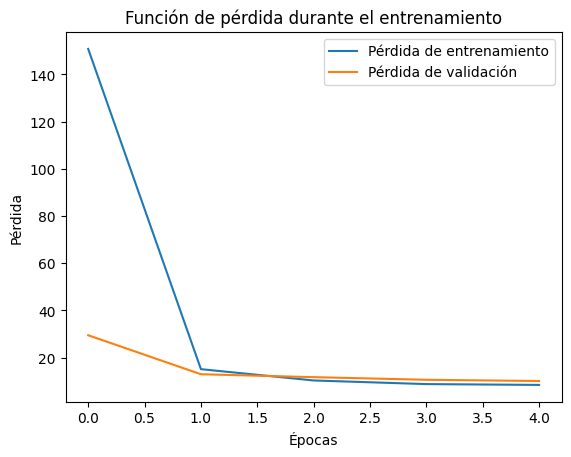

In [51]:
import matplotlib.pyplot as plt #Gráficando la funcion de pérdida

# Graficar la función de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


In [52]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1) #Evaluar el modelo en el conjunto de prueba
print(f'Test Mean Absolute Error: {test_mae:.2f}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.3095 - root_mean_squared_error: 3.0431 
Test Mean Absolute Error: 3.17


In [53]:
predictions = model.predict(X_test) #Hacer predicciones y comparar las predicciones con los valores reales
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head())


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
     Actual  Predicted
82     23.0  21.072506
167    29.0  27.824612
356    32.4  33.832314
120    19.0  17.911308
385    38.0  37.898834


In [54]:
# otras metricas
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)
print(f'R²: {r2}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')


R²: 0.8549677855862206
MSE: 10.053963091537593


### **XOR**

In [55]:
import numpy as np
# Entradas del problema XOR
# Cada fila representa un par (x1, x2)
# Datos XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])


In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Se crea una red neuronal secuencial
modelo = Sequential([
    Dense(4, activation='relu', input_dim=2),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.01
adam_optimizer = Adam(learning_rate=learning_rate)


In [58]:
# Se configura el modelo con el optimizador, la función de pérdida y la métrica
modelo.compile(
    optimizer=adam_optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [59]:
# Se entrena el modelo con los datos de entrada (X) y salida (y)
history = modelo.fit(
    X, y,
    epochs=50,
    verbose=0,
)


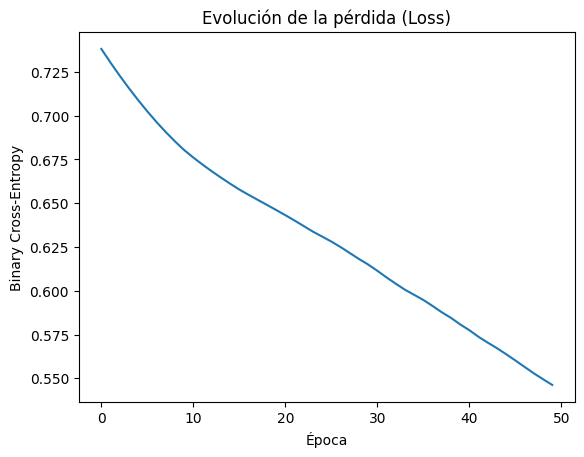

In [60]:
import matplotlib.pyplot as plt
# Se grafica cómo cambió el error (loss) durante el entrenamiento
plt.plot(history.history['loss'])
plt.title('Evolución de la pérdida (Loss)')
plt.xlabel('Época')
plt.ylabel('Binary Cross-Entropy')
plt.show()

In [63]:
# Se calcula la pérdida (loss) y la precisión (accuracy) del modelo
loss, accuracy = modelo.evaluate(X, y)
print(f'Loss: {loss}, Accuracy: {accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.5436
Loss: 0.5435516238212585, Accuracy: 1.0


In [62]:
# El modelo predice las salidas para cada entrada de X
# Si el valor es mayor que 0.5, se considera como 1; de lo contrario, 0
pred = (modelo.predict(X) > 0.5).astype(int)
for i, (inp, p) in enumerate(zip(X, pred)):
    print(f"{inp} -> {p[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
[0 0] -> 0
[0 1] -> 1
[1 0] -> 1
[1 1] -> 0
